<a href="https://colab.research.google.com/github/dwishashah/Phishing-Website-Detection/blob/main/PhishingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn import metrics

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/malicious_benign.csv')
df.head(50)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/9/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/5/1996 0:00,11/4/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/8/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/7/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


# Exploratory Data Analysis

In [ ]:
df.shape

(1781, 21)

In [ ]:
df.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_109,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [ ]:
print(df.isnull().sum())

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [ ]:
df.dropna(inplace=True)

# dropping the not needed columns
df.drop(['URL','CONTENT_LENGTH','CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', ], axis =1, inplace=True)

print(df.isnull().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [ ]:
# Verifying correlation among features

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.914616,0.018584,0.071610,0.053408,0.016469,0.018902,0.013793,0.012381,0.017463,0.018902,0.011702,-0.183955
NUMBER_SPECIAL_CHARACTERS,0.914616,1.000000,0.018174,0.054938,0.057562,0.019724,0.021984,0.016633,0.007171,0.023288,0.021984,0.069238,-0.026275
TCP_CONVERSATION_EXCHANGE,0.018584,0.018174,1.000000,0.235672,0.307239,0.976480,0.998291,0.993865,0.972554,0.970667,0.998291,0.300822,0.000347
DIST_REMOTE_TCP_PORT,0.071610,0.054938,0.235672,1.000000,0.442912,0.314607,0.258648,0.236733,0.137946,0.331813,0.258648,0.453453,-0.136900
REMOTE_IPS,0.053408,0.057562,0.307239,0.442912,1.000000,0.337006,0.334414,0.289318,0.154791,0.359046,0.334414,0.543964,0.048205
APP_BYTES,0.016469,0.019724,0.976480,0.314607,0.337006,1.000000,0.981002,0.971596,0.931299,0.998748,0.981002,0.394992,0.022187
SOURCE_APP_PACKETS,0.018902,0.021984,0.998291,0.258648,0.334414,0.981002,1.000000,0.993040,0.963407,0.978080,1.000000,0.356007,0.017656
REMOTE_APP_PACKETS,0.013793,0.016633,0.993865,0.236733,0.289318,0.971596,0.993040,1.000000,0.978830,0.966535,0.993040,0.312929,0.003206
SOURCE_APP_BYTES,0.012381,0.007171,0.972554,0.137946,0.154791,0.931299,0.963407,0.978830,1.000000,0.919344,0.963407,0.169382,-0.036737
REMOTE_APP_BYTES,0.017463,0.023288,0.970667,0.331813,0.359046,0.998748,0.978080,0.966535,0.919344,1.000000,0.978080,0.440278,0.036317


In [ ]:
# removing highly correlated features
df.drop(['TCP_CONVERSATION_EXCHANGE','URL_LENGTH','APP_BYTES','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','SOURCE_APP_BYTES','REMOTE_APP_BYTES'], axis = 1, inplace=True)

# Re-verification of the rest of features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_PACKETS,DNS_QUERY_TIMES,Type
NUMBER_SPECIAL_CHARACTERS,1.000000,0.054938,0.057562,0.021984,0.069238,-0.026275
DIST_REMOTE_TCP_PORT,0.054938,1.000000,0.442912,0.258648,0.453453,-0.136900
REMOTE_IPS,0.057562,0.442912,1.000000,0.334414,0.543964,0.048205
APP_PACKETS,0.021984,0.258648,0.334414,1.000000,0.356007,0.017656
DNS_QUERY_TIMES,0.069238,0.453453,0.543964,0.356007,1.000000,0.283626
Type,-0.026275,-0.136900,0.048205,0.017656,0.283626,1.000000


In [ ]:
df.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Visualization

## NUMBER SPECIAL CHARACTERS

<Axes: xlabel='NUMBER_SPECIAL_CHARACTERS', ylabel='Density'>

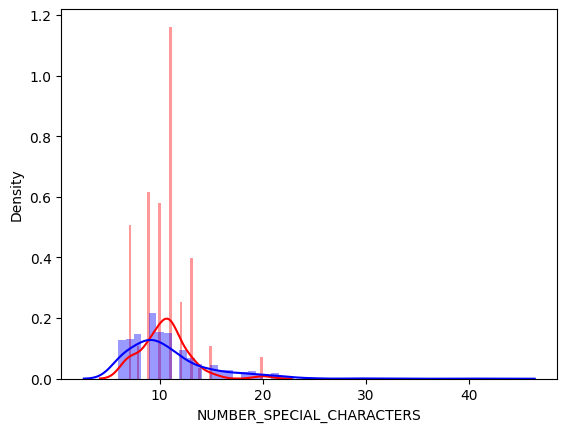

In [ ]:
import seaborn as sns
sns.distplot(df.loc[df['Type'] == 1]['NUMBER_SPECIAL_CHARACTERS'], bins = 50, color='red')
sns.distplot(df.loc[df['Type'] == 0]['NUMBER_SPECIAL_CHARACTERS'], bins = 50, color='blue')

Observations:

It looks like malicious websites have more special characters. The red bars are the malicious websites, there are some definite odd spikes.

## DIST REMOTE TCP PORT

0     62
1     38
5      3
18     1
4      1
8      1
Name: DIST_REMOTE_TCP_PORT, dtype: int64


<Axes: xlabel='DIST_REMOTE_TCP_PORT', ylabel='Density'>

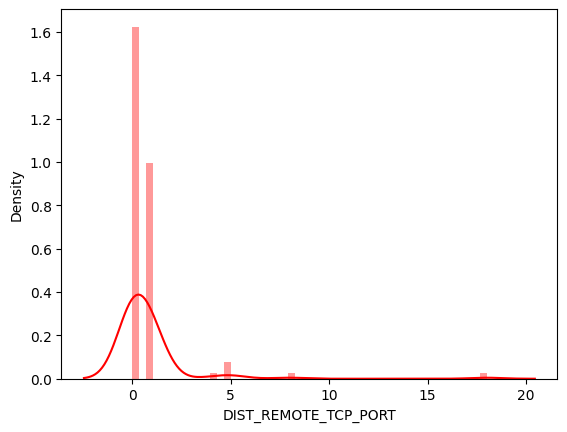

In [ ]:
# for malicious websites

print(df.loc[df['Type'] == 1]['DIST_REMOTE_TCP_PORT'].value_counts())
sns.distplot(df.loc[df['Type'] == 1]['DIST_REMOTE_TCP_PORT'], bins = 50, color='red')

0     433
3      82
2      46
6      40
4      40
1      38
5      32
7      23
8      17
9      17
10     15
11      8
12      8
13      7
14      5
19      4
26      3
17      3
20      3
22      3
18      3
32      3
25      3
27      3
15      2
21      2
34      2
42      2
58      1
43      1
51      1
28      1
30      1
38      1
16      1
31      1
40      1
35      1
41      1
33      1
39      1
47      1
Name: DIST_REMOTE_TCP_PORT, dtype: int64


<Axes: xlabel='DIST_REMOTE_TCP_PORT', ylabel='Density'>

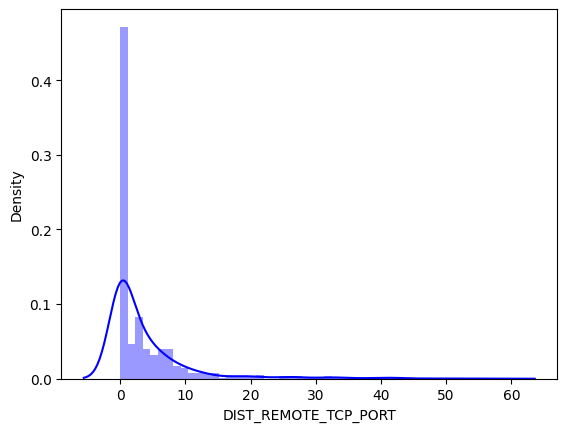

In [ ]:
# for benign website

print(df.loc[df['Type'] == 0]['DIST_REMOTE_TCP_PORT'].value_counts())
sns.distplot(df.loc[df['Type'] == 0]['DIST_REMOTE_TCP_PORT'], bins = 50, color='blue')

Observations:

It looks like malicious websites generally don't have a port associated. We may verify it in further analysis and may remove if not affects the modelling.

## REMOTE IPS

<Axes: xlabel='REMOTE_IPS', ylabel='Density'>

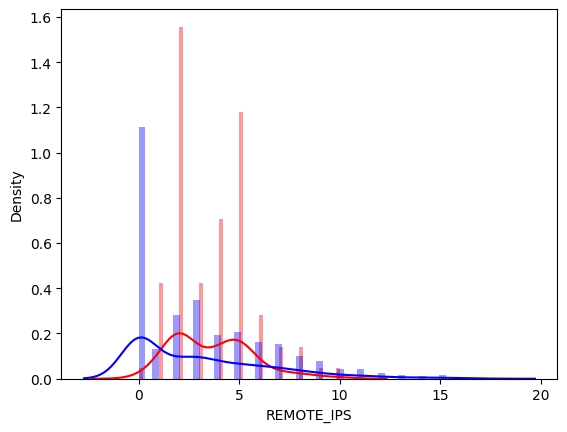

In [ ]:
sns.distplot(df.loc[df['Type'] == 1]['REMOTE_IPS'], bins = 50, color='red')
sns.distplot(df.loc[df['Type'] == 0]['REMOTE_IPS'], bins = 50, color='blue')

Observations:

REMOTE_IPS means that 'this variable has the total number of IPs connected to the honeypot'. It seems like malicious websites have a slightly lower grouping of remote IPs connected than benign.

## APP PACKETS

<Axes: >

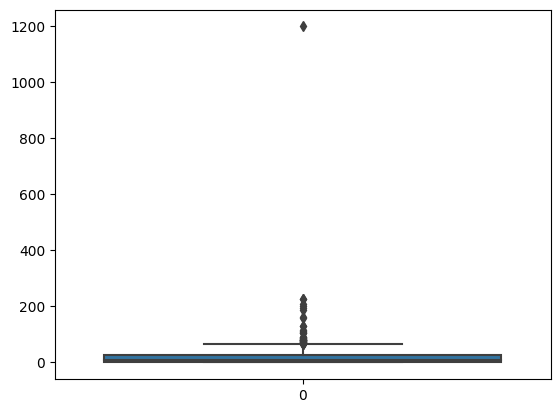

In [ ]:
sns.boxplot(df['APP_PACKETS'])

Observations:

There are some outliers which may be corrected.

<Axes: >

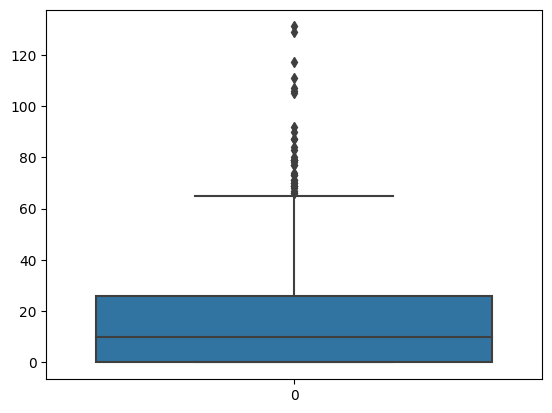

In [ ]:
# correcting the outliers
df = df[((df.APP_PACKETS - df.APP_PACKETS.mean()) / df.APP_PACKETS.std()).abs() < 3]

# reverifying the outliers, they are removed.
sns.boxplot(df['APP_PACKETS'])

Observation:

After removal of outliers, it is better. Lets see it in histogram

<Axes: xlabel='APP_PACKETS', ylabel='Density'>

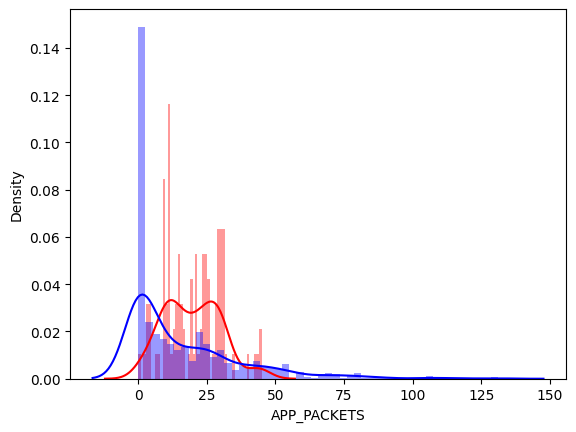

In [ ]:
# histogram for APP_PACKETS
sns.distplot(df.loc[df['Type'] == 1]['APP_PACKETS'], bins = 50, color='red')
sns.distplot(df.loc[df['Type'] == 0]['APP_PACKETS'], bins = 50, color='blue')

## DNS_QUERY_TIMES

0.0     490
4.0     189
6.0     133
2.0      81
8.0      56
10.0      8
12.0      1
Name: DNS_QUERY_TIMES, dtype: int64


<Axes: xlabel='DNS_QUERY_TIMES', ylabel='Density'>

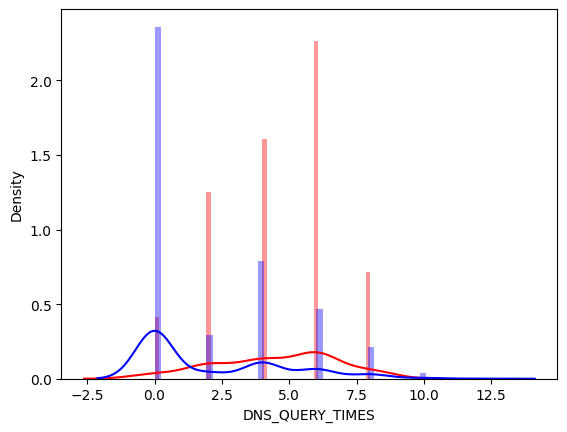

In [ ]:
print(df['DNS_QUERY_TIMES'].value_counts())

sns.distplot(df.loc[df['Type'] == 1]['DNS_QUERY_TIMES'], bins = 50, color='red')
sns.distplot(df.loc[df['Type'] == 0]['DNS_QUERY_TIMES'], bins = 50, color='blue')

Observation:

This chart does not infer anything special.

In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 1780
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  958 non-null    int64  
 1   DIST_REMOTE_TCP_PORT       958 non-null    int64  
 2   REMOTE_IPS                 958 non-null    int64  
 3   APP_PACKETS                958 non-null    int64  
 4   DNS_QUERY_TIMES            958 non-null    float64
 5   Type                       958 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 84.7 KB


# NLP Model Evaluation

## Creating custom Transformer

In [ ]:
# Creating custom transformer using spaCy
class transformer(TransformerMixin):
    def transform(self,X,**transform_params):

        # Cleaning the text
        return [clean(i) for i in X]
    # Fitting the transformer

    def fit(self,X,y=None,**fit_params):
        return self

    # Predicting the transformer
    def get_params(self,deep=True):
        return{}

# Basic clean function
def clean(i):
    return i

    # Removing the spaces and converting all the text into lowercase
    #return i.strip().lower()

## Creating Tokenizer

In [ ]:
# Creating our list of punctuations
punc = string.punctuation

# Creating our list of stopwords
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Loading parser
parse = English()

# Creating the tokenizer function
def tokenize(token):
    # Creating the token object where all the tokenization functions are applied starting
    # with parsing
    token_obj = parse(token)

    # Lemmatizing each token and converting it into lowercase
#     token_obj = [i.lemma_.lower().strip() if i.lemma_!='-PRON-' else i.lower_ for i in token_obj]

    # Removing stop words and punctuations
    token_obj = [i for i in token_obj if i not in stopwords and i not in punc]

    # Returning the token
    return token_obj

## Creating TF-IDF Vectorizer

In [ ]:
# Creating TF-IDF Vectorizer
tfidf_vect= TfidfVectorizer(tokenizer=tokenize,use_idf=True, smooth_idf=True, sublinear_tf=False)

In [ ]:
# Preparing data
# Scale data then split

from sklearn import preprocessing
# Separate into train and test as well as features and predictor
X = df.drop('Type',axis=1) #Predictors
y = df['Type']
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## Creating NLP Pipeline for RandomForestClassifier

In [ ]:
# Importing Random Forest Classifier and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')

# Importing RandomizedSearchCV and assigning the parameters
from sklearn.model_selection import RandomizedSearchCV
params = {'criterion':['entropy','gini'],'max_depth':range(1,15,2)}

# Fitting the RandomizedSearchCV model
rfc = RandomizedSearchCV(rf,params)

In [ ]:
# Creating the pipeline
pipe_rf = Pipeline([('clean',transformer()),
#                  ('vectorizer',tfidf_vect), # we have all the attributes int, so we dont need this
                 ('model',rfc)])

# Model generation
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('clean', <__main__.transformer object at 0x78e1b6c4ff70>),
                ('model',
                 RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                                    param_distributions={'criterion': ['entropy',
                                                                       'gini'],
                                                         'max_depth': range(1, 15, 2)}))])

In [ ]:
# Importing the metrics
from sklearn import metrics

# Predicting with test data
pred = pipe_rf.predict(X_test)

In [ ]:
# Model accuracy,precision and recall
print('Accuracy',metrics.accuracy_score(y_test,pred))
print('Precision',metrics.precision_score(y_test,pred,average=None))
print('Recall',metrics.recall_score(y_test,pred,average=None))
print('F1-Score',metrics.f1_score(y_test,pred,average=None))

Accuracy 0.9444444444444444
Precision [0.95833333 0.79166667]
Recall [0.98062016 0.63333333]
F1-Score [0.96934866 0.7037037 ]


In [ ]:
# Confusion matrix
conf_matrix_rf = metrics.confusion_matrix(y_test,pred)
print(conf_matrix_rf)

[[253   5]
 [ 11  19]]


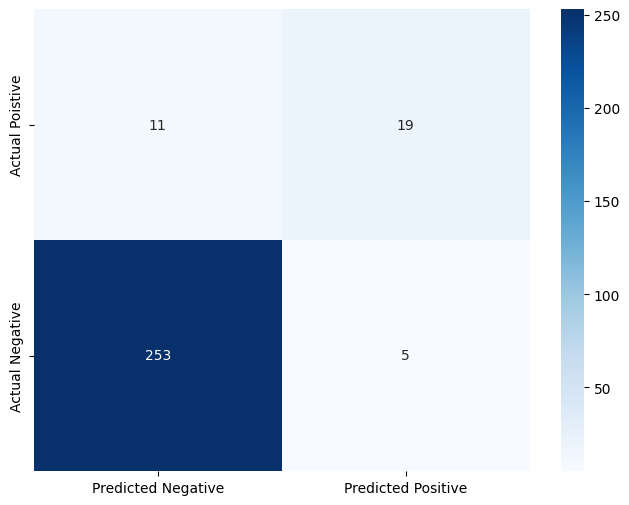

In [ ]:
# Plotting the confusion matrix
cfm= conf_matrix_rf
lbl1=["Predicted Negative", "Predicted Positive"]
lbl2=["Actual Negative", "Actual Poistive"]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
ax.set_ylim([0,2])
plt.show()

## Creating NLP Pipeline for SupportVectorClassifier

In [ ]:
# Importing RandomizedSearchCV and assigning the parameters
from sklearn.model_selection import RandomizedSearchCV
params = {'criterion':['entropy','gini'],'max_depth':range(1,15,2)}

# Fitting the RandomizedSearchCV model
rfc = RandomizedSearchCV(rf,params)

In [ ]:
# Importing Support Vector Classifier algorithm
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

params1 = {'kernel':['linear','rbf','poly','sigmoid'],'C': [0.01, 0.1, 1,10],'gamma': [0.01,0.1,1,10]}

# Fitting the RandomizedSearchCV model
svcc = RandomizedSearchCV(svc,params1)

In [ ]:
# Creating the pipeline
pipe = Pipeline([('clean',transformer()),
#                  ('vectorizer',tfidf_vect), # all the parameters are int, we do not need this.
                 ('model',svcc)])

# Model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('clean', <__main__.transformer object at 0x78e1b6416a70>),
                ('model',
                 RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                                    param_distributions={'C': [0.01, 0.1, 1,
                                                               10],
                                                         'gamma': [0.01, 0.1, 1,
                                                                   10],
                                                         'kernel': ['linear',
                                                                    'rbf',
                                                                    'poly',
                                                                    'sigmoid']}))])

In [ ]:
# Predicting with test data
pred = pipe.predict(X_test)

# Model accuracy,precision and recall
print('Accuracy',metrics.accuracy_score(y_test,pred))
print('Precision',metrics.precision_score(y_test,pred,average=None))
print('Recall',metrics.recall_score(y_test,pred,average=None))
print('F1-Score',metrics.f1_score(y_test,pred,average=None))

Accuracy 0.8715277777777778
Precision [0.93675889 0.4       ]
Recall [0.91860465 0.46666667]
F1-Score [0.92759295 0.43076923]


In [ ]:
# Confusion matrix
conf_matrix_rf = metrics.confusion_matrix(y_test,pred)
print(conf_matrix_rf)

[[237  21]
 [ 16  14]]


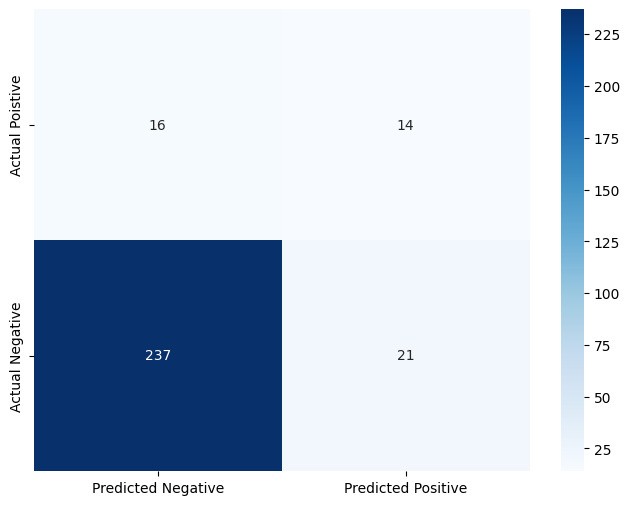

In [ ]:
# Plotting the confusion matrix
cfm= conf_matrix_rf
lbl1=["Predicted Negative", "Predicted Positive"]
lbl2=["Actual Negative", "Actual Poistive"]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
ax.set_ylim([0,2])
plt.show()

Observation:

In NLP, RandomForestClassifier gives better result.

# ML Model Evaluation

In [ ]:
# Method for evaluating results
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculateScores(y_test, predictions):
    accuracy = 100*accuracy_score(y_test, predictions)
    precision = 100*precision_score(y_test, predictions)
    recall = 100*recall_score(y_test, predictions)
    f1 = 100*f1_score(y_test, predictions)
    print (' Accuracy  %.2f%%' % accuracy)
    print (' Precision %.2f%%'% precision)
    print (' Recall    %.2f%%'% recall)
    print (' F1        %.2f%%'% f1)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    return {'Accuracy':accuracy, 'F1': f1}

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='lbfgs')
model = reg.fit(X_train, y_train)
predictions = model.predict(X_test)
scores = calculateScores(y_test, predictions)

 Accuracy  86.81%
 Precision 16.67%
 Recall    6.67%
 F1        9.52%
Confusion Matrix
[[248  10]
 [ 28   2]]


Observation:

Let's see if we can improve this with a neural network. We'll use the standard SciKit learn class, starting off by using all the default values, before attempting to optimise it by adjusting its parameters.

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
scores = calculateScores(y_test, predictions)

 Accuracy  92.01%
 Precision 68.42%
 Recall    43.33%
 F1        53.06%
Confusion Matrix
[[252   6]
 [ 17  13]]


Straight away that's a small improvement on the simple model, it is better at classifying the malicious websites, as seen in the confusion matrix and the F1 score.

Let's have a play with the parameters to see if this can be improved.



In [ ]:
def predict( X_train, y_train, **kwargs):
    mlp = MLPClassifier(**kwargs, random_state=1)
    mlp.fit(X_train, y_train)
    return mlp.predict(X_test)

In [ ]:
def calculateScoresNoOutput(y_test, predictions):
    accuracy = 100*accuracy_score(y_test, predictions)
    precision = 100*precision_score(y_test, predictions)
    recall = 100*recall_score(y_test, predictions)
    f1 = 100*f1_score(y_test, predictions)
    return {'Accuracy':accuracy, 'F1': f1}

In [ ]:
# Let's try the different solvers
solvers = ['lbfgs', 'sgd', 'adam']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df1 = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df1

,Solver,Accuracy,F1
0,lbfgs,88.888889,46.666667
1,sgd,89.583333,0.000000
2,adam,92.013889,53.061224


Looks like the lbfgs solver is the best, with highest accuray and F1 scores. We'll use that from now on.

In [ ]:
# Generalise attempting different values
def try_different_values(values, column_name, X_train, y_train, **kwargs):
    results = []
    for value in values:
        kwargs[column_name] = value
        result_dict = calculateScoresNoOutput(y_test, predict(X_train, y_train, **kwargs))
        result_dict[column_name] = value
        results.append(result_dict)
    df2 = pd.DataFrame(results, columns = [column_name,'Accuracy', 'F1'])
    return df2

In [ ]:
activations = ['identity', 'logistic', 'tanh', 'relu']
try_different_values(activations, 'activation', X_train, y_train, solver='lbfgs')

,activation,Accuracy,F1
0,identity,89.583333,42.307692
1,logistic,91.319444,57.627119
2,tanh,90.625000,57.142857
3,relu,88.888889,46.666667


Observation:

In ML, Logistic regression gives better result.

ModuleNotFoundError: ignored